In [5]:
import obonet
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
lion_graph = obonet.read_obo('../data/lion/lion_ontology_graph.obo')

In [6]:
G =lion_graph

In [11]:
G.nodes

NodeView(('CAT:0000000', 'CAT:0000091', 'CAT:0000092', 'CAT:0000100', 'CAT:0000123', 'CAT:0000463', 'CAT:0001734', 'CAT:0002945', 'CAT:0002946', 'CAT:0012007', 'CAT:0012008', 'CAT:0080950', 'CAT:0080951', 'LION:0000000', 'LION:0000001', 'LION:0000002', 'LION:0000003', 'LION:0000004', 'LION:0000005', 'LION:0000006', 'LION:0000007', 'LION:0000008', 'LION:0000009', 'LION:0000010', 'LION:0000011', 'LION:0000012', 'LION:0000013', 'LION:0000014', 'LION:0000015', 'LION:0000016', 'LION:0000017', 'LION:0000018', 'LION:0000019', 'LION:0000020', 'LION:0000021', 'LION:0000022', 'LION:0000023', 'LION:0000024', 'LION:0000025', 'LION:0000026', 'LION:0000027', 'LION:0000028', 'LION:0000029', 'LION:0000030', 'LION:0000031', 'LION:0000032', 'LION:0000033', 'LION:0000034', 'LION:0000035', 'LION:0000036', 'LION:0000037', 'LION:0000038', 'LION:0000039', 'LION:0000040', 'LION:0000041', 'LION:0000042', 'LION:0000043', 'LION:0000044', 'LION:0000045', 'LION:0000046', 'LION:0000047', 'LION:0000048', 'LION:00000

In [ ]:
print(G.edge)

[('CAT:0000092', 'CAT:0000091'), ('CAT:0000100', 'CAT:0000091'), ('CAT:0000123', 'CAT:0000091'), ('CAT:0000463', 'CAT:0000091'), ('CAT:0001734', 'CAT:0000091'), ('CAT:0002945', 'CAT:0000091'), ('CAT:0002946', 'CAT:0000091'), ('CAT:0080950', 'CAT:0000091'), ('CAT:0080951', 'CAT:0000091'), ('LION:0000000', 'LION:0000259'), ('LION:0000000', 'LION:0000563'), ('LION:0000001', 'CAT:0000000'), ('LION:0000002', 'CAT:0000000'), ('LION:0000003', 'CAT:0000000'), ('LION:0000004', 'CAT:0000000'), ('LION:0000005', 'CAT:0000000'), ('LION:0000006', 'CAT:0000000'), ('LION:0000006', 'LION:0012009'), ('LION:0000007', 'CAT:0000000'), ('LION:0000008', 'CAT:0000000'), ('LION:0000009', 'LION:0000003'), ('LION:0000010', 'LION:0000003'), ('LION:0000010', 'LION:0000095'), ('LION:0000010', 'LION:0012010'), ('LION:0000010', 'LION:0012080'), ('LION:0000011', 'LION:0000003'), ('LION:0000011', 'LION:0000095'), ('LION:0000011', 'LION:0012010'), ('LION:0000011', 'LION:0012080'), ('LION:0000011', 'LION:0012081'), ('LIO

In [16]:
nx.is_directed_acyclic_graph(G)

True

In [18]:
id_to_name = {id_: data.get('name') for id_, data in G.nodes(data=True)}

In [19]:
id_to_name

{'CAT:0000000': 'lipid classification',
 'CAT:0000091': 'physical or chemical properties',
 'CAT:0000092': 'charge headgroup',
 'CAT:0000100': 'contains fatty acid',
 'CAT:0000123': 'type by bond',
 'CAT:0000463': 'intrinsic curvature',
 'CAT:0001734': 'chain-melting transition temperature',
 'CAT:0002945': 'fatty acid unsaturation',
 'CAT:0002946': 'fatty acid chain length',
 'CAT:0012007': 'function',
 'CAT:0012008': 'cellular component',
 'CAT:0080950': 'lateral diffusion',
 'CAT:0080951': 'bilayer thickness',
 'LION:0000000': 'CE(14:0)',
 'LION:0000001': 'fatty acids [FA]',
 'LION:0000002': 'glycerolipids [GL]',
 'LION:0000003': 'glycerophospholipids [GP]',
 'LION:0000004': 'sphingolipids [SP]',
 'LION:0000005': 'sterol lipids [ST]',
 'LION:0000006': 'prenol lipids [PR]',
 'LION:0000007': 'saccharolipids [SL]',
 'LION:0000008': 'polyketides [PK]',
 'LION:0000009': 'other glycerophospholipids [GP00]',
 'LION:0000010': 'glycerophosphocholines [GP01]',
 'LION:0000011': 'glycerophospho

In [23]:
[print(id_to_name[x]) for x in networkx.descendants(G, 'LION:0000983')]

charge headgroup
physical or chemical properties
mitochondrion
headgroup with negative charge
cellular component
diacylglycerophosphoglycerophosphodiradylglycerols [GP1201]
negative intrinsic curvature
glycerophosphoglycerophosphoglycerols [GP12]
function
lipid classification
glycerophospholipids [GP]
intrinsic curvature
membrane component


[None, None, None, None, None, None, None, None, None, None, None, None, None]

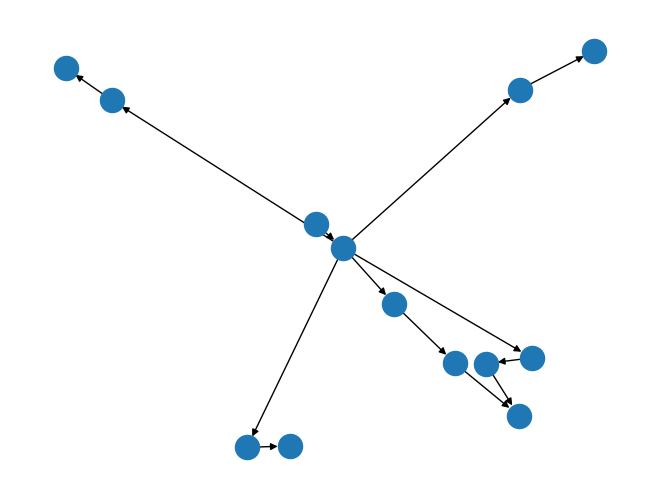

In [27]:
nx.draw(G.subgraph(nx.descendants(G, 'LION:0000983')))

In [36]:
ontology_terms = set(['LION:0000983', 'LION:0000931'])

nodes = set()

for term in ontology_terms:
    nodes.update(nx.descendants(G, term) | {'root'})

nodes = G.subgraph(nodes)
nodes

In [38]:
nx.to_edgelist(nodes)

OutMultiEdgeDataView([('LION:0012084', 'CAT:0012008', {}), ('LION:0000604', 'LION:0000002', {}), ('LION:0000604', 'LION:0000094', {}), ('LION:0000604', 'LION:0012011', {}), ('LION:0000604', 'LION:0012084', {}), ('LION:0000094', 'CAT:0000092', {}), ('LION:0000622', 'LION:0000604', {}), ('LION:0000464', 'CAT:0000463', {}), ('LION:0000002', 'CAT:0000000', {}), ('LION:0012010', 'CAT:0012007', {}), ('LION:0000728', 'LION:0000021', {}), ('CAT:0000092', 'CAT:0000091', {}), ('LION:0012081', 'CAT:0012008', {}), ('LION:0000093', 'CAT:0000092', {}), ('CAT:0000463', 'CAT:0000091', {}), ('LION:0012011', 'CAT:0012007', {}), ('LION:0000021', 'LION:0000003', {}), ('LION:0000021', 'LION:0000093', {}), ('LION:0000021', 'LION:0000464', {}), ('LION:0000021', 'LION:0012010', {}), ('LION:0000021', 'LION:0012081', {}), ('LION:0000003', 'CAT:0000000', {})])

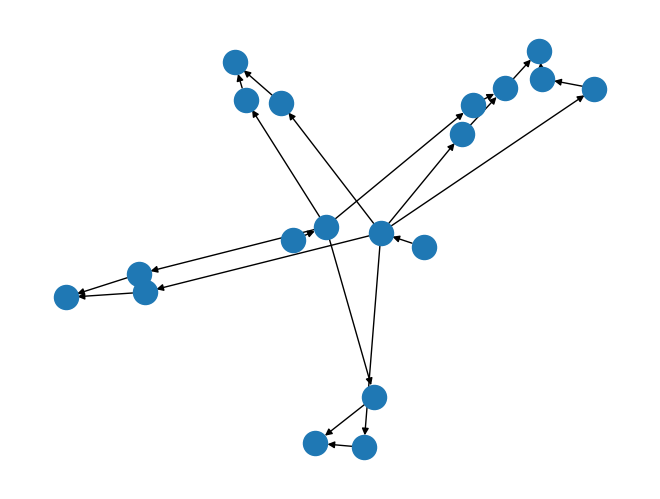

In [35]:
nx.draw(G.subgraph(nodes))

In [40]:
{id: data['name'] for id, data in G.subgraph(nodes).nodes.data()}

{'LION:0012084': 'lipid droplet',
 'LION:0000604': 'triradylglycerols [GL03]',
 'LION:0000094': 'headgroup with neutral charge',
 'LION:0000622': 'triacylglycerols [GL0301]',
 'LION:0000464': 'negative intrinsic curvature',
 'LION:0000002': 'glycerolipids [GL]',
 'LION:0012010': 'membrane component',
 'CAT:0000091': 'physical or chemical properties',
 'LION:0000728': 'diacylglycerophosphoglycerophosphodiradylglycerols [GP1201]',
 'CAT:0000000': 'lipid classification',
 'CAT:0000092': 'charge headgroup',
 'LION:0012081': 'mitochondrion',
 'LION:0000093': 'headgroup with negative charge',
 'CAT:0012008': 'cellular component',
 'CAT:0000463': 'intrinsic curvature',
 'LION:0012011': 'lipid storage',
 'CAT:0012007': 'function',
 'LION:0000021': 'glycerophosphoglycerophosphoglycerols [GP12]',
 'LION:0000003': 'glycerophospholipids [GP]'}